In [16]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#The following two functions are used to generate the polymer... gen_monomer_axis and create_polymer

#gen_monomer_axis creates a coordinate value (either X Y or Z) that is within r = 1 distance from the preceding coordiate value. For example: If the previous monomer was located and X = 1, gen_monomer_axis generates a coordinate value that is within the range X = [0, 2].

#create_polymer generates and plots a string of monomers all within r = 1 distance from each other.

def no_overlap(new_monomer, polymer_dictionary):
    
    new_x, new_y, new_z = new_monomer
    # pull out previous monomer data by iterating through all the keys in polymer dictionary 
    for polymer in polymer_dictionary.keys():
        
        value = 0.2
        for row in range(0, len(polymer_dictionary[polymer]['m_x'])):
            
            xval, yval, zval = polymer_dictionary[polymer]['m_x'][row], polymer_dictionary[polymer]['m_y'][row], polymer_dictionary[polymer]['m_z'][row]
            if ((new_x-value) < xval)\
                & (xval < (new_x+value))\
                & ((new_y-value) < yval)\
                & (yval < (new_y+value) )\
                & ((new_z-value) in zval)\
                & (zval < (new_z + value) ):
                    return False
            else:
                return True


def gen_monomer_axis(x, y, z, cube_size, polymer_dictionary):
    #Generate the coordinate for the axis. 
    r = 2
    # Generates a random digit between 0.1 and r (= 1).
    # Then in the `random.choice()` part, it randomly makes it negative or positive.
    b = random.uniform(0.1, r) * random.choice((-1, 1))
 
    new_x = x + b
    if (new_x < 0) | (new_x > cube_size):
        new_x = x - b
    
    new_y = y - b
    if (new_y < 0) | (new_y > cube_size):
        new_y = y + b
        
    new_z = z + b
    if (new_z < 0) | (new_z > cube_size):
        new_z = z - b
    
    new_coordinate = (new_x, new_y, new_z)
    
    k = 0
    while no_overlap(new_coordinate, polymer_dictionary) == False:
        b = random.uniform(0.1, r) * random.choice((-1, 1))
 
        new_x = x - b
        if (new_x < 0) | (new_x > cube_size):
            new_x = x + b
    
        new_y = y + b
        if (new_y < 0) | (new_y > cube_size):
            new_y = y - b
        
        new_z = z - b
        if (new_z < 0) | (new_z > cube_size):
            new_z = z + b
    
        k += 1
        if k == 100:
            print("no.")
            break
            
    
    x = new_x
    y = new_y
    z = new_z

def create_polymer(n_monomers=10, cube_size=100, n_polymers=10, ballsize=10, save_data=False):
    """
    Instantiate a monomer at a random position (X, Y, Z=0) with the following constraints:
    1. The monomers cannot occupy the same space
    2. The monomers must all be at most a distance r=1 apart from each other

    TODO: All polymers are growing at the same time, so we might want to iterate by monomers
    first for ALL polymers
    
    Parameter(s)
    -----------
    n_monomers : int
        The number of monomers that the polymer will contain. Default is 10.
    save_data : bool
        When parameter is set to True, a pandas dataframe will be generated and stored
        in a CSV (data) file that can be opened and plotted for later use.

    Returns
    -------
    fig : matplitlib.figure object
    """
    # Initialize matplotlib canvas that we will plot a 3D plane on
    fig = plt.figure()

    # This new axis (`ax`) is a 3D projection
    ax = plt.axes(projection="3d")
    
    # Let's set the axis limits for each dimension 10
    # TODO: Be able to make it wide and short :D
    ax.axes.set_xlim3d(left=0, right=cube_size) 
    ax.axes.set_ylim3d(bottom=0, top=cube_size) 
    ax.axes.set_zlim3d(bottom=0, top=10*cube_size)
    
    #declares empty dictionary named "d"
    d = {}   
    
    for i in np.arange(0, n_polymers):
        
        #creates subdictionary for each polymer with lists for monomer number, monomer coordinates, and monomer volume of all monomer for that polymer
        d[f'polymer_{i}'] = {'m_no':[], 'm_x':[], 'm_y':[], 'm_z':[], 'm_vol':[]}
        
        #Put initial monomer in list m_no
        d[f'polymer_{i}']['m_no'].append(0)
        
        #create first monomer coordinates:
        start_x, start_y, start_z = np.random.rand(0, cube_size), np.random.rand(0, cube_size), 0
                
        #Put initial coordiante values in lists:
        d[f'polymer_{i}']['m_x'].append(start_x)
        d[f'polymer_{i}']['m_y'].append(start_y)
        d[f'polymer_{i}']['m_z'].append(start_z)
            
        #For each monomer in the polymer generate new monomer coordinates:
        for j in np.arange(1, n_monomers):
            #generate new coordinates for the next monomers
            # Create a while loop, that will run until the last list (zs) reaches number of monomers for the polymer. 
            d[f'polymer_{i}']['m_no'].append(j)
            
#             for axis, axlabel in zip([d[f'polymer_{i}']['m_x'], d[f'polymer_{i}']['m_y'], d[f'polymer_{i}']['m_z']], ['x', 'y', 'z']):
#                 new_monomer = gen_monomer_axis(axis[-1], axlabel, cube_size, polymer_dictionary=d)
#                 axis.append(new_monomer) 
  
            new_monomer_coordinates = gen_monomer_axis(d[f'polymer_{i}']['m_x'][-1], d[f'polymer_{i}']['m_y'][-1], d[f'polymer_{i}']['m_z'][-1], cube_size, polymer_dictionary=d)
            d[f'polymer_{i}']['m_x'].append(x)
            d[f'polymer_{i}']['m_y'].append(y)
            d[f'polymer_{i}']['m_z'].append(z)
        
        ax.scatter(d[f'polymer_{i}']['m_x'], d[f'polymer_{i}']['m_y'], d[f'polymer_{i}']['m_z'], edgecolor='k', lw=0.5)
        plt.show
        
        if save_data:
            da = {'x' : d[f'polymer_{i}']['m_x'], 'y': d[f'polymer_{i}']['m_y'], 'z': d[f'polymer_{i}']['m_z']}
            df = pd.DataFrame(data=da)
            df.to_csv(f"polymer1_{i}.csv")
    
    return d
    return cube_size


    
    

C:\Users\kati1\AppData\Local\Temp\ipykernel_13164\1339152905.py:42: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (new_x < 0) | (new_x > cube_size):
C:\Users\kati1\AppData\Local\Temp\ipykernel_13164\1339152905.py:46: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (new_y < 0) | (new_y > cube_size):


TypeError: argument of type 'int' is not iterable

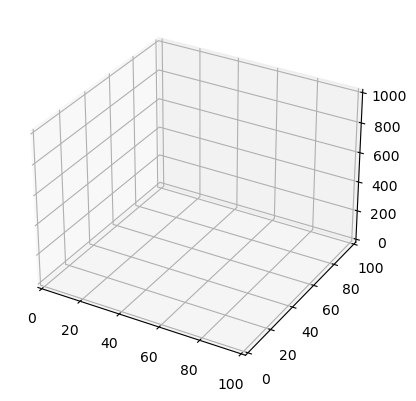

In [17]:
d = create_polymer(n_monomers=10, cube_size=100, n_polymers=1, ballsize=10, save_data=True)

In [18]:
pwd

'C:\\Users\\kati1\\OneDrive - Georgia Institute of Technology\\Biophysics VMD stuff\\Project'